<a href="https://colab.research.google.com/github/Haque14/MSE504/blob/main/final_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Packages

Name: Md Ershadul Haque

Department: Mechanical, Aerospace, and Biomedical Engineering

Note that installing both Mendeleev and Materials Project is a bit tricky. Please follow the instructions in the markdown fields.

In [ ]:
!pip install mp_api
!pip install -U mendeleev

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.9/211.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.5 MB/s eta 0:00:00
   ━━━━

*** Do not restart the runtime here***

# Mendeleev

This is the link to original Mendeleev package: https://github.com/lmmentel/mendeleev/


**Now restart the runtime and run the code below**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mendeleev
import sqlalchemy

from mendeleev.fetch import fetch_table

In [ ]:
from mendeleev import Si, Fe, O
print("Si's name: ", Si.name)
print("Fe's atomic number:", Fe.atomic_number)
print("O's atomic weight: ", O.atomic_weight)

Si's name:  Silicon
Fe's atomic number: 26
O's atomic weight:  15.999


In [ ]:
# what modules are in mendeleev
# dir(mendeleev)

In [ ]:
# mendeleev.models.IonicRadius

In [ ]:
ptable = fetch_table('elements')
ptable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   annotation                     118 non-null    object 
 1   atomic_number                  118 non-null    int64  
 2   atomic_radius                  90 non-null     float64
 3   atomic_volume                  91 non-null     float64
 4   block                          118 non-null    object 
 5   density                        118 non-null    float64
 6   description                    109 non-null    object 
 7   dipole_polarizability          117 non-null    float64
 8   electron_affinity              77 non-null     float64
 9   electronic_configuration       118 non-null    object 
 10  evaporation_heat               88 non-null     float64
 11  fusion_heat                    75 non-null     float64
 12  group_id                       90 non-null     flo

In [ ]:
cols = ['atomic_number', 'symbol', 'atomic_radius', 'en_pauling', 'block', 'vdw_radius_mm3']
ptable[cols].head()

,atomic_number,symbol,atomic_radius,en_pauling,block,vdw_radius_mm3
0,1,H,25.0,2.20,s,162.0
1,2,He,120.0,NaN,s,153.0
2,3,Li,145.0,0.98,s,255.0
3,4,Be,105.0,1.57,s,223.0
4,5,B,85.0,2.04,p,215.0


In [ ]:
df_elements = ptable[cols]
df_elements.head()

,atomic_number,symbol,atomic_radius,en_pauling,block,vdw_radius_mm3
0,1,H,25.0,2.20,s,162.0
1,2,He,120.0,NaN,s,153.0
2,3,Li,145.0,0.98,s,255.0
3,4,Be,105.0,1.57,s,223.0
4,5,B,85.0,2.04,p,215.0


Now we have access to the properties of elements

# Materials Project API

This part of the notebook shows how to curate data from Materials Project along with an example to send a query.

- Notebook prepared by Ayana Ghosh

- Email: research.aghosh@gmail.com

Import libraries

In [ ]:
#using new version of Materials Project API
from mp_api.client import MPRester
import pandas as pd

Check which properties are available

- https://github.com/materialsproject/mapidoc/tree/master/materials
- https://next-gen.materialsproject.org/api

In [ ]:
MPRestermpr = MPRester("Fyy195X4eENbE9KHTlkZK0lzVSREjq7v")
MPRestermpr.materials.available_fields

['builder_meta',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'material_id',
 'structure',
 'deprecated',
 'deprecation_reasons',
 'initial_structures',
 'task_ids',
 'deprecated_tasks',
 'calc_types',
 'last_updated',
 'created_at',
 'origins',
 'warnings',
 'task_types',
 'run_types',
 'entries']

Example query that gives material systems with following criteria:
insulating, stable, direct band gap and combines it into a dataframe

In [ ]:
docs = MPRestermpr.materials.summary.search(is_metal=False,is_stable=True,
                          all_fields=False,is_gap_direct=True,theoretical=False,
                          fields=["material_id","structure","e_total", 'initial_structures',
                                  "symmetry","formula_pretty","formation_energy_per_atom","energy_above_hull"])

Retrieving SummaryDoc documents:   0%|          | 0/3682 [00:00<?, ?it/s]

In [ ]:
# Experiment with what is contained in these fields
# docs[2]

In [ ]:
df = pd.DataFrame()
df["mpids"] = [doc.material_id for doc in docs]
df["struc"] = [doc.structure for doc in docs]
df["crystal_system"]    = [doc.symmetry.crystal_system for doc in docs]
df["e_total"]                       = [doc.e_total for doc in docs]
df["pretty_formula"]                = [doc.formula_pretty for doc in docs]
df["formation_energy_per_atom"]     = [doc.formation_energy_per_atom for doc in docs]
df["energy_above_hull"]             = [doc.energy_above_hull for doc in docs]

In [ ]:
df.head()

,mpids,struc,crystal_system,e_total,pretty_formula,formation_energy_per_atom,energy_above_hull
0,mp-30274,"[[3.23277773 3.23277773 6.29799073] Ac, [1.077...",Tetragonal,NaN,AcBrO,-3.362475,0.0
1,mp-18125,"[[5.48781898 4.9540164 2.67787168] Ag, [ 0. ...",Monoclinic,NaN,Ag(AuF4)2,-1.203594,0.0
2,mp-567334,"[[7.87262662 7.87262662 7.87262662] Ag, [ 7.87...",Cubic,NaN,Ag(BCl)6,-0.736951,0.0
3,mp-1195193,"[[ 0.1486133 25.49510107 0.1398944 ] Ag, [ 0...",Monoclinic,NaN,Ag12Sn7H16(Se11N2)2,-0.480199,0.0
4,mp-23558,"[[5.88286112 4.72844634 2.42596894] Ag, [4.524...",Orthorhombic,26.531189,Ag2BiO3,-0.923417,0.0


Now, let's import a different object.

In [ ]:
docs2 = MPRestermpr.materials.summary.search(is_metal=False,is_stable=True,
                          all_fields=False,is_gap_direct=False,theoretical=False,
                          fields=["material_id","elements","nelements", "symmetry",
                                  "composition","volume", "density","formula_anonymous","formation_energy_per_atom","energy_above_hull"])

Retrieving SummaryDoc documents:   0%|          | 0/8677 [00:00<?, ?it/s]

In [ ]:
df2 = pd.DataFrame()
df2["mpids"] = [doc.material_id for doc in docs2]
df2["elements"] = [doc.elements for doc in docs2]
df2["nelements"] = [doc.nelements for doc in docs2]
df2["composition"]  = [doc.composition for doc in docs2]
df2["volume"] = [doc.volume for doc in docs2]
df2["density"] = [doc.density for doc in docs2]
df2["crystal_system"]    = [doc.symmetry.crystal_system for doc in docs2]
df2["energy_above_hull"] = [doc.energy_above_hull for doc in docs2]
df2["formula_anonymous"] = [doc.formula_anonymous for doc in docs2]
df2["formation_energy_per_atom"] = [doc.formation_energy_per_atom for doc in docs2]
df2["energy_above_hull"] = [doc.energy_above_hull for doc in docs2]

In [ ]:
df2.tail()

,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom
8672,mp-1102830,"[S, Tl, Zr]",3,"(Zr, Tl, S)",312.784505,6.330170,Monoclinic,0.0,AB2C3,-1.228971
8673,mp-7049,"[Cu, S, Tl, Zr]",4,"(Zr, Tl, Cu, S)",264.615543,5.714885,Orthorhombic,0.0,ABCD3,-1.236513
8674,mp-7050,"[Cu, Se, Tl, Zr]",4,"(Zr, Tl, Cu, Se)",289.745446,6.831766,Orthorhombic,0.0,ABCD3,-1.092194
8675,mp-30997,"[F, Tl, Zr]",3,"(Zr, Tl, F)",418.151318,6.204504,Monoclinic,0.0,ABC5,-3.490225
8676,mp-554326,"[O, V, Zr]",3,"(Zr, V, O)",714.217756,2.837427,Cubic,0.0,AB2C7,-2.814241


# Exploring Element Space

Now, let's select only the binary compounds from the dataframe df2

In [ ]:
df_AB = df2[df2['formula_anonymous'].isin(['AB'])]
df_AB.head()

,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975


The actual entries in the table are fairly complex objects in the Materials Project format. Rather then digging deep into it, we will simply convert it into string object and create two columns that contain the element symbols.

In [ ]:
df_AB.loc[:, 'Ell_Val'] = df_AB['elements'].astype(str)

# Remove "Element" and split into two columns 'x' and 'y'
df_AB['Ell_Val'] = df_AB['Ell_Val'].str.replace('Element', '')
df_AB[['x', 'y']] = df_AB['Ell_Val'].str.strip('[]').str.split(', ', expand=True)

# Convert the 'x' and 'y' columns to strings if needed
df_AB['x'] = df_AB['x'].astype(str)
df_AB['y'] = df_AB['y'].astype(str)

df_AB.head()

<ipython-input-19-f77b3c512794>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB.loc[:, 'Ell_Val'] = df_AB['elements'].astype(str)
<ipython-input-19-f77b3c512794>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['Ell_Val'] = df_AB['Ell_Val'].str.replace('Element', '')
<ipython-input-19-f77b3c512794>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom,Ell_Val,x,y
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400,"[ Ag, Br]",Ag,Br
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440,"[ Ag, Cl]",Ag,Cl
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043,"[ Al, As]",Al,As
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249,"[ Al, P]",Al,P
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975,"[ Al, Sb]",Al,Sb


Now, let's create an additional column and set the values there as Pauling electronegativity for the element in column 'x'

In [ ]:
df_AB['El1_pauling'] = None

for index, row in df_AB.iterrows():
    z = row['x'].strip()
    matching_row = df_elements[df_elements['symbol'] == z]
    if not matching_row.empty:
        electro_value = matching_row['en_pauling'].values[0]
        df_AB.at[index, 'El1_pauling'] = electro_value

<ipython-input-20-a972239474c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['El1_pauling'] = None


And do the same for the element in column 'y'

In [ ]:
df_AB['El2_pauling'] = None

for index, row in df_AB.iterrows():
    z = row['y'].strip()
    matching_row = df_elements[df_elements['symbol'] == z]

    if not matching_row.empty:
        electro_value = matching_row['en_pauling'].values[0]
        df_AB.at[index, 'El2_pauling'] = electro_value

df_AB.head()

<ipython-input-21-37ff43e2a9d8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['El2_pauling'] = None


,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom,Ell_Val,x,y,El1_pauling,El2_pauling
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400,"[ Ag, Br]",Ag,Br,1.93,2.96
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440,"[ Ag, Cl]",Ag,Cl,1.93,3.16
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043,"[ Al, As]",Al,As,1.61,2.18
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249,"[ Al, P]",Al,P,1.61,2.19
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975,"[ Al, Sb]",Al,Sb,1.61,2.05


Finally, let's create column crystal_system2 that will contain the data on the crystal system.

In [ ]:
'''
df_AB['crystal_system2'] = df_AB['crystal_system'].str.extract(r"'(.*?)'")
df_AB.head()
'''

'\ndf_AB[\'crystal_system2\'] = df_AB[\'crystal_system\'].str.extract(r"\'(.*?)\'")\ndf_AB.head()\n'

In [ ]:
df_AB['crystal_system2'] = None

# Iterate through each row and apply str() to 'crystal_system' column
for index, row in df_AB.iterrows():
    elt = str(row['crystal_system'])
    df_AB.at[index, 'crystal_system2'] = elt

df_AB.head()

<ipython-input-23-9563d4eec0dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['crystal_system2'] = None


,mpids,elements,nelements,composition,volume,density,crystal_system,energy_above_hull,formula_anonymous,formation_energy_per_atom,Ell_Val,x,y,El1_pauling,El2_pauling,crystal_system2
53,mp-23231,"[Ag, Br]",2,"(Ag, Br)",48.383938,6.444351,Cubic,0.0,AB,-0.504400,"[ Ag, Br]",Ag,Br,1.93,2.96,Cubic
54,mp-22922,"[Ag, Cl]",2,"(Ag, Cl)",42.630581,5.582623,Cubic,0.0,AB,-0.568440,"[ Ag, Cl]",Ag,Cl,1.93,3.16,Cubic
110,mp-2172,"[Al, As]",2,"(Al, As)",45.711095,3.701818,Cubic,0.0,AB,-0.627043,"[ Al, As]",Al,As,1.61,2.18,Cubic
137,mp-1550,"[Al, P]",2,"(Al, P)",40.983458,2.348192,Cubic,0.0,AB,-0.737249,"[ Al, P]",Al,P,1.61,2.19,Cubic
144,mp-2624,"[Al, Sb]",2,"(Al, Sb)",59.151809,4.175547,Cubic,0.0,AB,-0.252975,"[ Al, Sb]",Al,Sb,1.61,2.05,Cubic


Now, let's see what crystal systems are there

In [ ]:
df_AB['crystal_system2'].values

array(['Cubic', 'Cubic', 'Cubic', 'Cubic', 'Cubic', 'Monoclinic',
       'Monoclinic', 'Monoclinic', 'Cubic', 'Cubic', 'Cubic', 'Cubic',
       'Cubic', 'Cubic', 'Cubic', 'Monoclinic', 'Orthorhombic', 'Cubic',
       'Orthorhombic', 'Orthorhombic', 'Monoclinic', 'Cubic',
       'Orthorhombic', 'Cubic', 'Hexagonal', 'Cubic', 'Cubic', 'Cubic',
       'Orthorhombic', 'Orthorhombic', 'Cubic', 'Cubic', 'Tetragonal',
       'Hexagonal', 'Monoclinic', 'Hexagonal', 'Cubic', 'Tetragonal',
       'Orthorhombic', 'Hexagonal', 'Monoclinic', 'Cubic', 'Cubic',
       'Monoclinic', 'Cubic', 'Cubic', 'Cubic', 'Cubic', 'Orthorhombic',
       'Orthorhombic', 'Cubic', 'Orthorhombic', 'Cubic', 'Cubic', 'Cubic',
       'Cubic', 'Hexagonal', 'Hexagonal', 'Monoclinic', 'Monoclinic',
       'Orthorhombic', 'Trigonal', 'Orthorhombic', 'Tetragonal',
       'Tetragonal', 'Tetragonal', 'Tetragonal', 'Orthorhombic',
       'Trigonal', 'Cubic', 'Hexagonal', 'Monoclinic', 'Cubic',
       'Orthorhombic', 'Monoclinic'

And plot the crystal system as a function of Pauling electronegativities of individual elements.

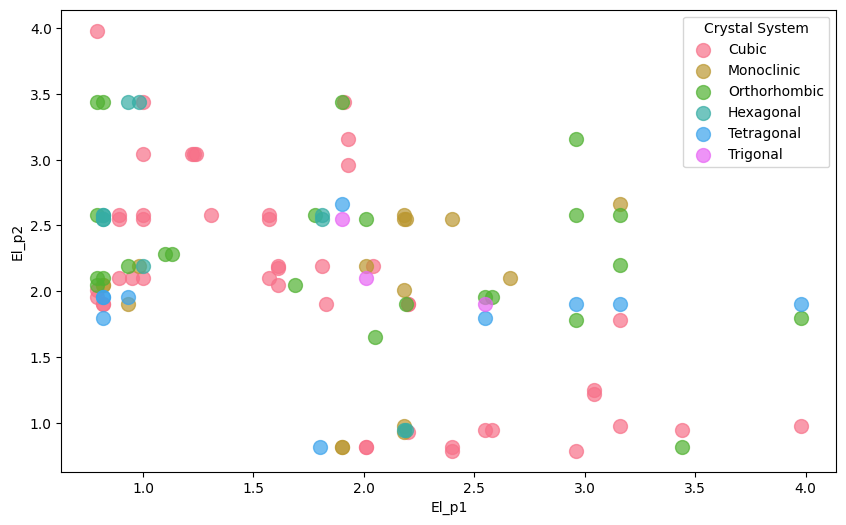

In [ ]:
import seaborn as sns

unique_entries = df_AB['crystal_system2'].unique()

plt.figure(figsize=(10, 6))
palette = sns.color_palette('husl', len(unique_entries))

# Create a scatterplot with different symbols for each unique entry
for i, entry in enumerate(unique_entries):
    subset = df_AB[df_AB['crystal_system2'] == entry]
    plt.scatter(subset['El1_pauling'], subset['El2_pauling'], label=entry, marker='o', s=100, alpha=0.7, color=palette[i])

# Add labels and legend
plt.xlabel('El_p1')
plt.ylabel('El_p2')
plt.legend(title='Crystal System')

# Show the plot
plt.show()

# Final Exam - I

In this part of exam, we will try to understand what properties of elements control the symmetry of the crystal structure of binary compounds.

I.1. Build the descriptor vector for each element based on the Mendeleev imports. For example, you can pick several elements from the list of (atomic_number, atomic_radius, dipole_polarizability,        electron_affinity, vdw_radius, covalent_radius_cordero, covalent_radius_pyykko, en_pauling, en_allen, covalent_radius_bragg, dipole_polarizability_unc, pettifor_number, glawe_number). Choose 4 - 8 descriptors and create dataframe for these descriptors for each element.

In [ ]:
# Import necessary libraries
from mendeleev.fetch import fetch_table
from mendeleev import element
import pandas as pd

# Step 1: Choose descriptors
descriptors = [
    "atomic_number",
    "atomic_radius",
    "dipole_polarizability",
    "electron_affinity",
    "vdw_radius",
    "covalent_radius_cordero",
    "en_pauling",
    "pettifor_number"
]

# Step 2: Fetch periodic table from Mendeleev
ptable = fetch_table("elements")  # Fetch all elements as a DataFrame

# Step 3: Build descriptor DataFrame
data = []
for _, row in ptable.iterrows():
    el = element(row["symbol"])  # Retrieve element object using its symbol
    try:
        # Collect descriptor values into a dictionary
        descriptor_values = {desc: getattr(el, desc) for desc in descriptors}
        descriptor_values["symbol"] = row["symbol"]  # Add element symbol for reference
        data.append(descriptor_values)
    except AttributeError:
        # Skip elements that don't have a particular descriptor
        pass

# Convert list of dictionaries to a DataFrame
df_descriptors = pd.DataFrame(data)

# Step 4: Handle missing values
# For numeric columns, fill NaN with a placeholder (-1)
numeric_columns = df_descriptors.select_dtypes(include=["float", "int"]).columns
df_descriptors[numeric_columns] = df_descriptors[numeric_columns].fillna(-1)

# For non-numeric columns, fill NaN with "N/A"
non_numeric_columns = df_descriptors.select_dtypes(exclude=["float", "int"]).columns
df_descriptors[non_numeric_columns] = df_descriptors[non_numeric_columns].fillna("N/A")

# Step 5: Save the descriptor DataFrame
df_descriptors.to_csv("element_descriptors.csv", index=False)

# Step 6: Display the DataFrame
print("Descriptor DataFrame:")
print(df_descriptors)

# Step 7: Inspect the DataFrame summary
print("\nDescriptor DataFrame Info:")
print(df_descriptors.info())

# Step 8: (Optional) Filter for specific elements
elements_in_use = ["Si", "O", "C", "N", "Al", "Fe", "Mg"]  # Example subset
df_filtered = df_descriptors[df_descriptors["symbol"].isin(elements_in_use)]
print("\nFiltered Descriptor DataFrame:")
print(df_filtered)

# Step 9: Analyze Correlations
correlation_matrix = df_descriptors.select_dtypes(include=["float", "int"]).corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# (Optional) Save the correlation matrix
correlation_matrix.to_csv("correlation_matrix.csv")


Descriptor DataFrame:
     atomic_number  atomic_radius  dipole_polarizability  electron_affinity  \
0                1           25.0                4.50711           0.754195   
1                2          120.0                1.38375         -19.700000   
2                3          145.0              164.11250           0.618049   
3                4          105.0               37.74000          -2.400000   
4                5           85.0               20.50000           0.279723   
..             ...            ...                    ...                ...   
113            114           -1.0               31.00000          -1.000000   
114            115           -1.0               71.00000          -1.000000   
115            116           -1.0               -1.00000          -1.000000   
116            117           -1.0               76.00000          -1.000000   
117            118           -1.0               58.00000           0.056000   

     vdw_radius  covalent_rad

I.2. Explain the choice of descriptors from the point of view of materials science. Why do you think the properties you selected should matter (feel free to discuss with ChatGPT)

Answer:

# Brief Explanation of Chosen Descriptors
**1. Atomic Number:**

* Defines an element's identity and periodic trends.
* Governs electronic configuration, bonding behavior, and reactivity.

**2. Atomic Radius:**

* Determines how atoms pack in solids and affects bond lengths.
* Influences crystal structure, coordination numbers, and material density.

**3. Dipole Polarizability:**

* Measures the atom’s response to an electric field.
* Important for dielectric properties, van der Waals interactions, and molecular stability.

**4. Electron Affinity:**

* Indicates the energy change when an atom gains an electron.
* Critical for electronic structure, ionic bonding, and reactivity.

**5. van der Waals Radius:**

* Represents the effective size of atoms in non-bonded interactions.
* Crucial for understanding packing density, molecular materials, and layered structures.

**6. Covalent Radius:**

* Defines the size of atoms in covalent bonds.
* Impacts bond lengths, mechanical strength, and flexibility of materials.

**7. Electronegativity (Pauling):**

* Reflects an atom's tendency to attract electrons in bonds.
* Influences bond types, band gaps, and electrical conductivity.

**8. Pettifor Number:**

* Heuristic property used to classify elements by chemical similarity.
* Essential for predicting alloy formation, phase diagrams, and thermodynamic stability.


# Why These Properties Are Relevant in Materials Science
**1. Structure-Property Relationships:**
* Descriptors like atomic radius, electronegativity, and covalent radius are
critical for understanding crystal structures and how atoms bond in materials.

**2. Electronic Properties:**

* Electron affinity, polarizability, and electronegativity determine electronic structures, which affect conductivity, band gaps, and semiconducting behavior.

**3. Chemical Reactivity:**

* Properties like electron affinity and electronegativity influence how elements react with one another, crucial for predicting material stability and synthesis conditions.

**4. Application-Driven Design:**

* These descriptors can help tailor materials for specific applications, such as high-strength alloys, semiconductors, or dielectric materials.

I.3. Explain the choice of descriptors from the point of view of data science. E.g.:
- Is there benefit in taking more simialr descriptors (e.g. different versions of the VdW radius), or not?
- What about augmenting the descriptor vector by symbol of the element? Can it improve prediction?

Answer:

**Is there benefit in taking more simialr descriptors (e.g. different versions of the VdW radius), or not?**

1. Benefits of Using Similar Descriptors
Including similar descriptors (e.g., different versions of van der Waals radius) can be beneficial if they provide complementary or distinct information:

Different Definitions Capture Different Contexts:
For example, van der Waals radii from different models might reflect different bonding environments or interaction strengths (e.g., crystalline vs. molecular).
Reduces Assumption Bias:
If there is uncertainty about which descriptor version is most relevant, including multiple options allows the model to decide their importance.
Weak Correlation:
If the descriptors are not strongly correlated, they may provide additional, independent insights.
2. Drawbacks of Using Similar Descriptors
Including multiple similar descriptors can also have drawbacks:

Redundancy:
If the descriptors are highly correlated, they add no new information and can increase noise in the model.
Dimensionality Issues:
Too many similar descriptors increase the dataset's dimensionality unnecessarily, leading to overfitting and longer training times (curse of dimensionality).
Reduced Interpretability:
If similar descriptors are included, it becomes harder to identify which descriptor is truly responsible for a prediction.
3. Best Practices
Correlation Analysis:

Before including similar descriptors, check their correlation using methods like Pearson correlation or covariance:
python
Copy code
correlation_matrix = df_descriptors.corr()
print(correlation_matrix)
If two descriptors are highly correlated (e.g., correlation coefficient > 0.9), choose one.
Feature Selection:

Use techniques like Recursive Feature Elimination (RFE) or Principal Component Analysis (PCA) to identify which descriptors contribute the most to the prediction.
Domain Knowledge:

Select descriptors based on the material system:
One Descriptor: For general-purpose models where simplicity and efficiency are key.
Multiple Descriptors: When studying systems where different models of the same property might matter (e.g., vdW radii in layered vs. molecular crystals).


Yes, there can be benefits in taking similar descriptors if they capture complementary aspects or reduce assumption bias.
However, avoid redundancy by checking correlation and using feature selection to ensure efficient and interpretable models.



**What about augmenting the descriptor vector by symbol of the element? Can it improve prediction?**

Augmenting the descriptor vector with the symbol of the element (e.g., "Si" or "O") can sometimes improve prediction, but its utility depends on the context and the type of machine learning model used:

**1. Benefits of Using Element Symbols**

* Categorical Information: The symbol introduces categorical data that can represent groupings (e.g., "Noble gases," "Metals").
* Periodic Trends: Models like decision trees or neural networks might implicitly learn periodic trends from the symbol.
* Heuristics: Some properties might be strongly tied to specific elements (e.g., "H" often forms polar bonds).

**2. Potential Drawbacks**
* Redundancy: The element symbol might not add much if the descriptors (e.g., atomic number) already encode the same information.
* Non-Numeric Nature: Many ML models (e.g., linear regression) require numeric data. Element symbols would need to be converted into numerical form using encoding techniques, which could introduce noise.

**3. When to Use Element Symbols**
* Small Datasets: When the dataset is small, categorical features like symbols can add additional differentiation.
* Missing Descriptors: If some elements lack certain descriptors, symbols can help the model make inferences based on known patterns for similar elements.

**4. Encoding Element Symbols**
To use symbols in ML models, there must be encoded:

* One-Hot Encoding: Converts each symbol into a binary vector. Useful for small datasets or non-linear models.
* Ordinal Encoding: Assigns a numerical value to each symbol. Suitable when symbols represent a natural order (e.g., periodic trends).


Including element symbols may improve prediction, especially for models that can leverage categorical data (e.g., tree-based methods). However, their utility decreases if the existing descriptors already capture the information (e.g., atomic number). Use encoding carefully to avoid redundancy and ensure meaningful contributions to the model.

I.4. Chose the unsupervised linear analysis method and explore the factors that control the crystal structure in the corresponding reduced dimensinality space. Note that you need to come up with some startegy for combining the information from both elements. For example:
- You can choose PCA and use the PCA1 component from first vector and PCA1 component from second vector
- Or you can concatenate the descriptors and analyze the combined descriptors.

Rows in df_AB: 111
Columns in df_AB: Index(['mpids', 'elements', 'nelements', 'composition', 'volume', 'density',
       'crystal_system', 'energy_above_hull', 'formula_anonymous',
       'formation_energy_per_atom', 'x', 'y', 'El1_pauling', 'El2_pauling',
       'atomic_number_x', 'atomic_number_y', 'atomic_radius_x',
       'atomic_radius_y', 'dipole_polarizability_x', 'dipole_polarizability_y',
       'electron_affinity_x', 'electron_affinity_y', 'vdw_radius_x',
       'vdw_radius_y', 'covalent_radius_cordero_x',
       'covalent_radius_cordero_y', 'en_pauling_x', 'en_pauling_y',
       'pettifor_number_x', 'pettifor_number_y'],
      dtype='object')
First few rows of x and y columns:
      x   y
53   Ag  Br
54   Ag  Cl
110  Al  As
137  Al   P
144  Al  Sb
First few rows with descriptors:
     atomic_number_x  atomic_number_y  atomic_radius_x  atomic_radius_y  \
53                47               35            160.0            115.0   
54                47               17           

<ipython-input-41-ee76fe4059dc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB['elements'] = df_AB['elements'].astype(str)  # Ensure elements column is string
<ipython-input-41-ee76fe4059dc>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AB[['x', 'y']] = df_AB['elements'].str.strip("[]").str.split(", ", expand=True)
<ipython-input-41-ee76fe4059dc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

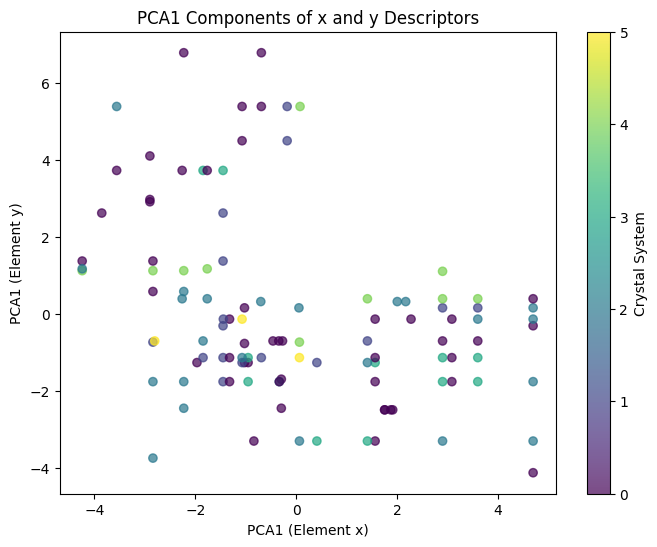

Explained Variance for x PCA1: [0.71764162]
Explained Variance for y PCA1: [0.70519369]


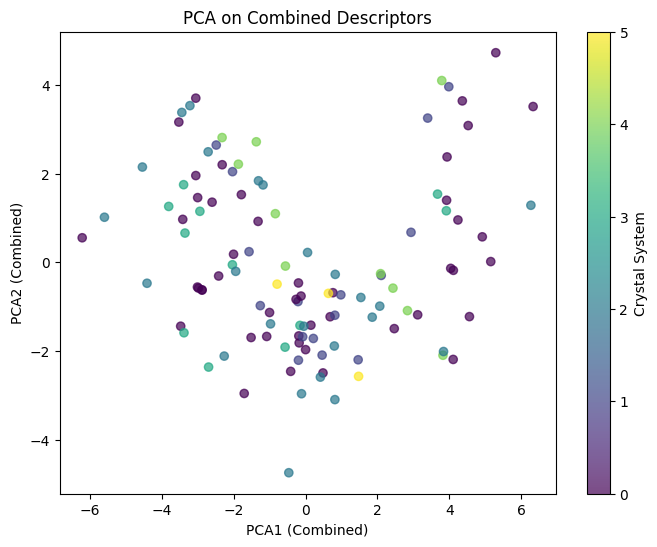

Explained Variance for Combined PCA: [0.48740121 0.2320702 ]


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Ensure df_AB is populated and valid
if df_AB.empty:
    raise ValueError("df_AB is empty. Ensure it is correctly populated before running this code.")

print("Rows in df_AB:", len(df_AB))
print("Columns in df_AB:", df_AB.columns)

# Ensure 'elements' column exists and split into 'x' and 'y'
if 'elements' not in df_AB.columns:
    raise ValueError("'elements' column is missing in df_AB. Ensure the data source contains this column.")

# Create 'x' and 'y' columns by splitting 'elements'
df_AB['elements'] = df_AB['elements'].astype(str)  # Ensure elements column is string
df_AB[['x', 'y']] = df_AB['elements'].str.strip("[]").str.split(", ", expand=True)

# Clean 'x' and 'y' by removing unwanted text
df_AB['x'] = df_AB['x'].str.replace("Element", "").str.strip()
df_AB['y'] = df_AB['y'].str.replace("Element", "").str.strip()

print("First few rows of x and y columns:")
print(df_AB[['x', 'y']].head())

# Step 2: Map descriptors for x and y elements
if df_descriptors.empty:
    raise ValueError("df_descriptors is empty. Ensure it contains valid descriptors.")

# Add descriptors for x and y elements
descriptor_columns = ['atomic_number', 'atomic_radius', 'dipole_polarizability',
                      'electron_affinity', 'vdw_radius', 'covalent_radius_cordero',
                      'en_pauling', 'pettifor_number']

for col in descriptor_columns:
    df_AB[f'{col}_x'] = df_AB['x'].map(df_descriptors.set_index('symbol')[col])
    df_AB[f'{col}_y'] = df_AB['y'].map(df_descriptors.set_index('symbol')[col])

# Verify descriptor mapping
print("First few rows with descriptors:")
print(df_AB[[col for col in df_AB.columns if col.endswith('_x') or col.endswith('_y')]].head())

# Step 3: Check for missing values and handle them
missing_columns = [col for col in df_AB.columns if col.endswith('_x') or col.endswith('_y')]
if df_AB[missing_columns].isnull().any().any():
    print("Warning: Missing values detected in descriptors. Filling with -1.")
    df_AB[missing_columns] = df_AB[missing_columns].fillna(-1)

# Step 4: Standardize descriptors for PCA
x_descriptors = df_AB[[col for col in df_AB.columns if col.endswith('_x')]]
y_descriptors = df_AB[[col for col in df_AB.columns if col.endswith('_y')]]

# Verify descriptors are not empty
if x_descriptors.empty or y_descriptors.empty:
    raise ValueError("Descriptor columns for x or y are empty. Check column suffixes in df_AB.")

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_descriptors)
y_scaled = scaler.fit_transform(y_descriptors)

# Step 5: Perform PCA separately for x and y
pca_x = PCA(n_components=1)
pca_y = PCA(n_components=1)

x_pca1 = pca_x.fit_transform(x_scaled).flatten()
y_pca1 = pca_y.fit_transform(y_scaled).flatten()

# Combine PCA results
pca_df = pd.DataFrame({
    'x_pca1': x_pca1,
    'y_pca1': y_pca1,
    'crystal_system': df_AB['crystal_system']
})

# Step 6: Convert crystal_system to numeric for visualization
if not pd.api.types.is_numeric_dtype(pca_df['crystal_system']):
    # Map each unique crystal system to a numeric value
    crystal_system_mapping = {cat: idx for idx, cat in enumerate(pca_df['crystal_system'].unique())}
    pca_df['crystal_system_numeric'] = pca_df['crystal_system'].map(crystal_system_mapping)

    print("Crystal system mapping:", crystal_system_mapping)
else:
    # If already numeric, use the same column
    pca_df['crystal_system_numeric'] = pca_df['crystal_system']

# Visualize PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['x_pca1'], pca_df['y_pca1'], c=pca_df['crystal_system_numeric'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Crystal System")
plt.xlabel("PCA1 (Element x)")
plt.ylabel("PCA1 (Element y)")
plt.title("PCA1 Components of x and y Descriptors")
plt.show()

print("Explained Variance for x PCA1:", pca_x.explained_variance_ratio_)
print("Explained Variance for y PCA1:", pca_y.explained_variance_ratio_)

# Step 7: Perform PCA on concatenated descriptors
combined_descriptors = pd.concat([x_descriptors, y_descriptors], axis=1)
combined_scaled = scaler.fit_transform(combined_descriptors)

pca_combined = PCA(n_components=2)
combined_pca = pca_combined.fit_transform(combined_scaled)

# Visualize PCA on combined descriptors
plt.figure(figsize=(8, 6))
plt.scatter(combined_pca[:, 0], combined_pca[:, 1], c=pca_df['crystal_system_numeric'], cmap='viridis', alpha=0.7)
plt.colorbar(label="Crystal System")
plt.xlabel("PCA1 (Combined)")
plt.ylabel("PCA2 (Combined)")
plt.title("PCA on Combined Descriptors")
plt.show()

print("Explained Variance for Combined PCA:", pca_combined.explained_variance_ratio_)


I.5. Choose the supervised linear analysis method and identify the factors that control crystal strucutre.

Top Features Controlling Crystal Structure:
                    Feature  Importance
3       electron_affinity_x    0.689195
6              en_pauling_x    0.527770
7         pettifor_number_x    0.416414
8           atomic_number_y    0.411282
10  dipole_polarizability_y    0.405133
11      electron_affinity_y    0.155565
1           atomic_radius_x    0.121948
0           atomic_number_x    0.055257
2   dipole_polarizability_x    0.000000
4              vdw_radius_x    0.000000

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67        12
           1       0.00      0.00      0.00         1
           2       0.33      0.25      0.29         4
           3       0.00      0.00      0.00         3
           4       0.50      0.50      0.50         2
           5       0.00      0.00      0.00         1

    accuracy                           0.52        23
   macro avg       0.23      0.26      0.24        23
weig

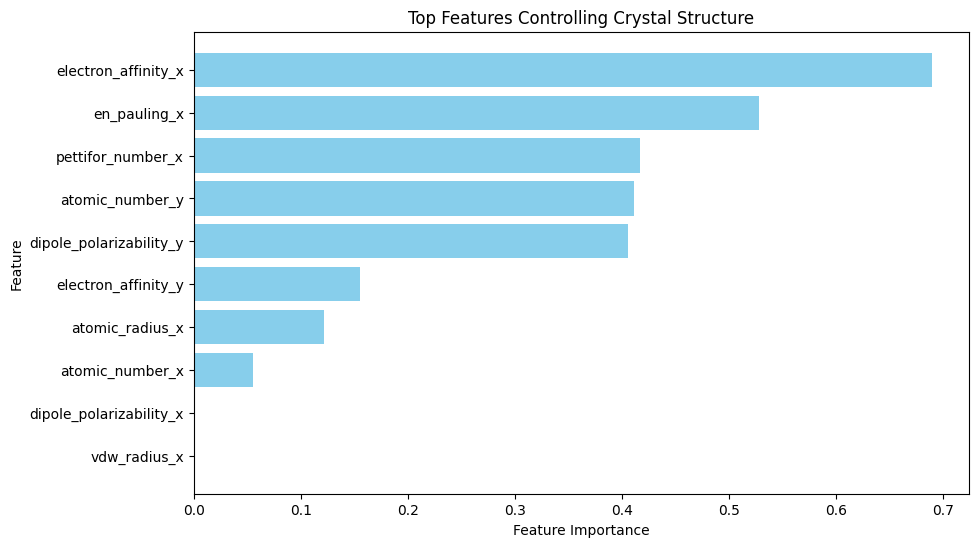

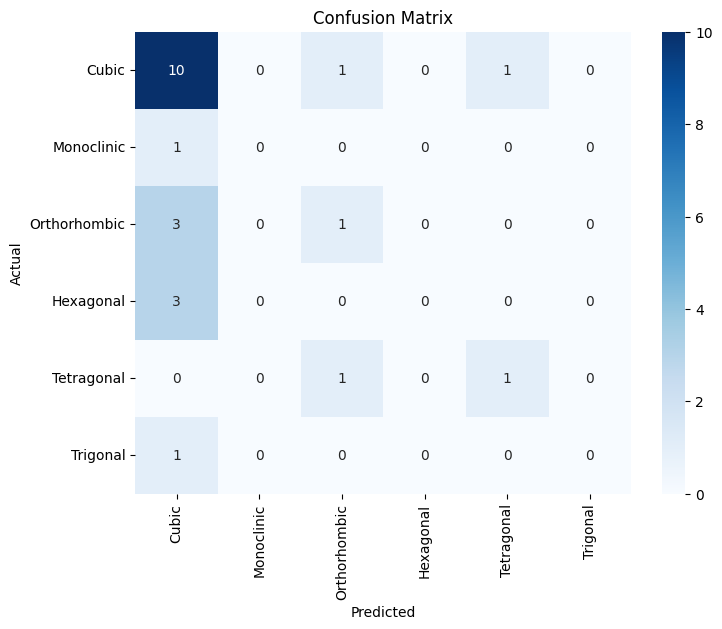

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 1: Ensure df_AB is properly prepared
# Concatenate descriptors for both x and y elements
predictors = pd.concat([x_descriptors, y_descriptors], axis=1)

# Map `crystal_system` to numeric values for supervised learning
crystal_system_mapping = {cat: idx for idx, cat in enumerate(df_AB['crystal_system'].unique())}
df_AB.loc[:, 'crystal_system_numeric'] = df_AB['crystal_system'].map(crystal_system_mapping)  # Fixed SettingWithCopyWarning

# Target variable
target = df_AB['crystal_system_numeric']

# Step 2: Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(predictors)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Step 4: Train a Logistic Regression Model
model = LogisticRegression(max_iter=500, solver='liblinear', penalty='l1')  # L1 penalty for feature selection
model.fit(X_train, y_train)

# Step 5: Interpret Feature Importance
feature_importance = np.abs(model.coef_[0])  # Absolute values of coefficients
feature_names = predictors.columns

# Combine features and importance into a DataFrame
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top Features Controlling Crystal Structure:")
print(importance_df.head(10))

# Step 6: Evaluate the Model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))  # Prevent UndefinedMetricWarning

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features Controlling Crystal Structure')
plt.gca().invert_yaxis()
plt.show()

# Step 8: Visualize the Confusion Matrix (Optional)
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=crystal_system_mapping.keys(),
            yticklabels=crystal_system_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



I.6. Choose the decision tree based method and identify the factors that control the crystal structure.

Top Features Controlling Crystal Structure:
                      Feature  Importance
3         electron_affinity_x    0.103711
2     dipole_polarizability_x    0.084745
0             atomic_number_x    0.071862
14               en_pauling_y    0.070550
7           pettifor_number_x    0.067715
8             atomic_number_y    0.064870
5   covalent_radius_cordero_x    0.061666
11        electron_affinity_y    0.060441
12               vdw_radius_y    0.058849
10    dipole_polarizability_y    0.055891

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.50      1.00      0.67         1
           2       0.40      0.50      0.44         4
           3       1.00      0.33      0.50         3
           4       1.00      0.50      0.67         2
           5       0.00      0.00      0.00         1

    accuracy                           0.70        23
   macro avg       0.61      0.54   

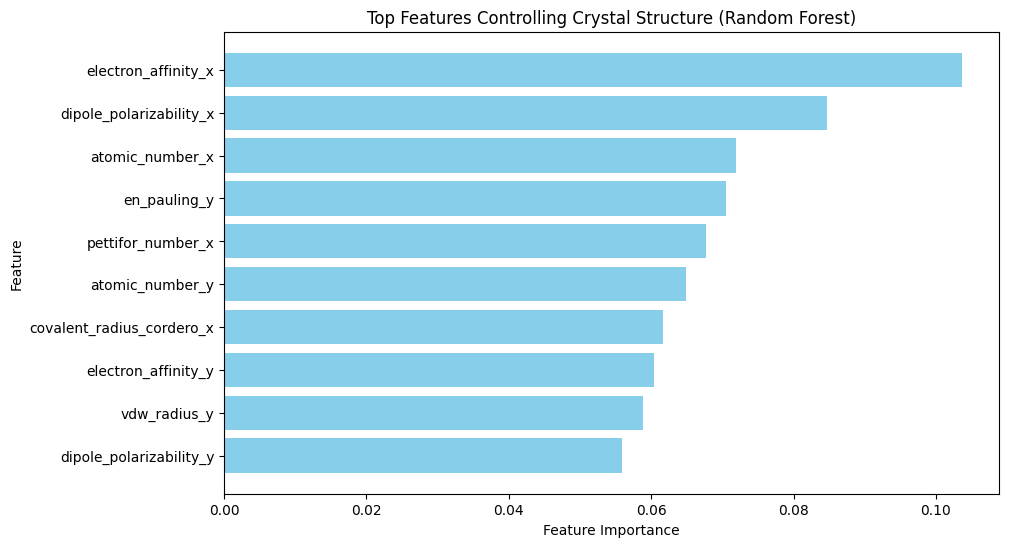

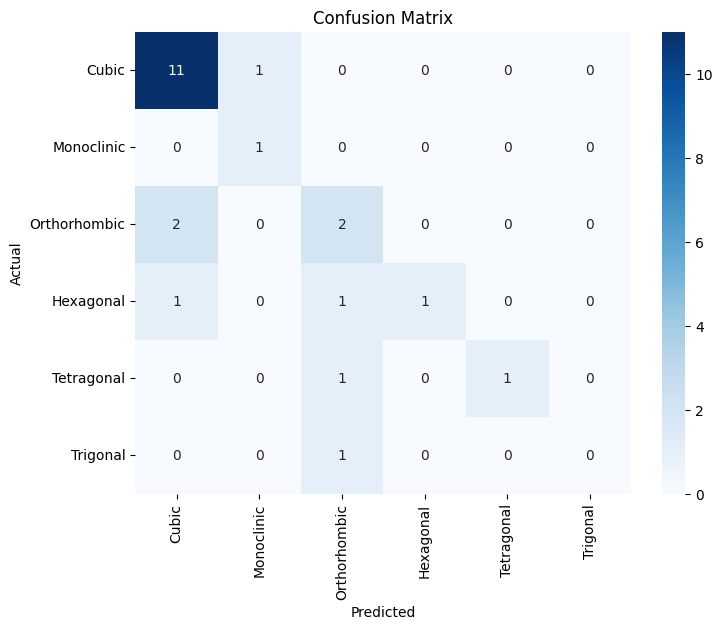

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the data
# Combine descriptors for x and y into a single matrix
predictors = pd.concat([x_descriptors, y_descriptors], axis=1)

# Map crystal_system to numeric values
crystal_system_mapping = {cat: idx for idx, cat in enumerate(df_AB['crystal_system'].unique())}
df_AB.loc[:, 'crystal_system_numeric'] = df_AB['crystal_system'].map(crystal_system_mapping)

# Define the target variable
target = df_AB['crystal_system_numeric']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

# Step 2: Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Identify Feature Importance
feature_importance = rf_model.feature_importances_
feature_names = predictors.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Top Features Controlling Crystal Structure:")
print(importance_df.head(10))

# Step 4: Evaluate the Model
y_pred = rf_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Step 5: Visualize Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top Features Controlling Crystal Structure (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

# Step 6: Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=crystal_system_mapping.keys(),
            yticklabels=crystal_system_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


I.7. Write the neural network based classifier that predicts the crystal structure based on the descriptors that you have chosen. Again, here you can choose one of multiple startegies. For example:

 - you can concatnate descriptors, or

-  build network that has two heads, then separate depe layer for each, then concatenation and then prediciton head.

Class Distribution in Target:
 crystal_system_numeric
0    47
2    24
1    16
3    11
4    10
5     3
Name: count, dtype: int64
Computed Class Weights:
 {0: 0.39361702127659576, 1: 1.15625, 2: 0.7708333333333334, 3: 1.6818181818181819, 4: 1.85, 5: 6.166666666666667}

Training Neural Network...
Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.2172 - loss: 1.8393 - val_accuracy: 0.1667 - val_loss: 1.9335
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2237 - loss: 1.7892 - val_accuracy: 0.1667 - val_loss: 1.8913
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2237 - loss: 1.6501 - val_accuracy: 0.0556 - val_loss: 1.8527
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2750 - loss: 1.5493 - val_accuracy: 0.0556 - val_loss: 1.8229
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2679 - loss: 1.7042 - val_accuracy: 0.0556 - val_loss: 1.8042
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2945 - loss: 1.5

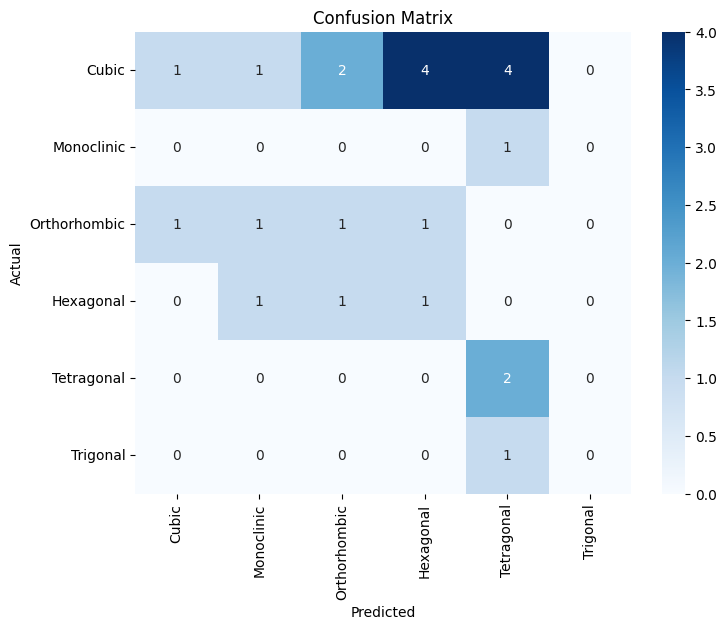

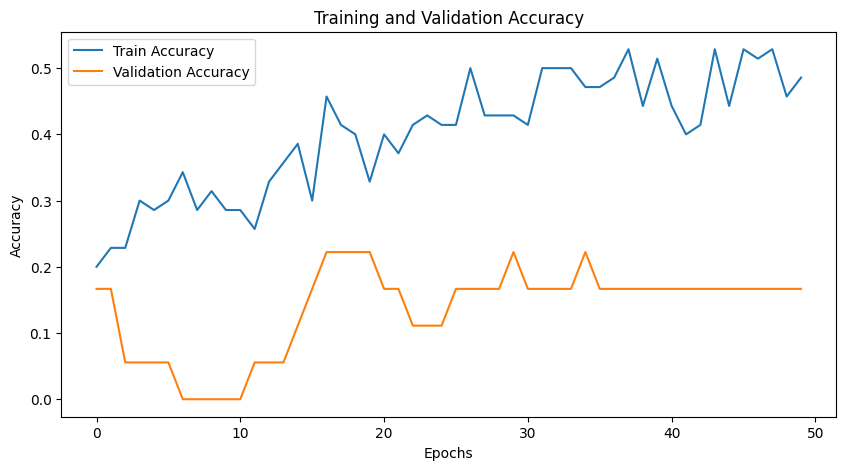

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the Data
# Combine descriptors for x and y into a single matrix
predictors = pd.concat([x_descriptors, y_descriptors], axis=1)

# Map crystal_system to numeric values
crystal_system_mapping = {cat: idx for idx, cat in enumerate(df_AB['crystal_system'].unique())}
df_AB.loc[:, 'crystal_system_numeric'] = df_AB['crystal_system'].map(crystal_system_mapping)

# Define target variable
target = df_AB['crystal_system_numeric']

# Scale the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(predictors)

# Convert target to categorical
num_classes = len(crystal_system_mapping)
y_categorical = tf.keras.utils.to_categorical(target, num_classes=num_classes)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Step 2: Check Class Distribution and Compute Class Weights
class_counts = target.value_counts()
print("Class Distribution in Target:\n", class_counts)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(target),
    y=target
)
class_weight_dict = dict(enumerate(class_weights))
print("Computed Class Weights:\n", class_weight_dict)

# Step 3: Build the Neural Network
model = Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),  # Corrected input definition
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Output layer with softmax
])

# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the Model
print("\nTraining Neural Network...")
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    class_weight=class_weight_dict,  # Apply class weights
    verbose=1
)

# Step 5: Evaluate the Model
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred, zero_division=0))  # Added zero_division to handle undefined metrics

conf_matrix = confusion_matrix(y_test_labels, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 6: Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=crystal_system_mapping.keys(),
            yticklabels=crystal_system_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Visualize Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


I.8. Calculate the ROC curve

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


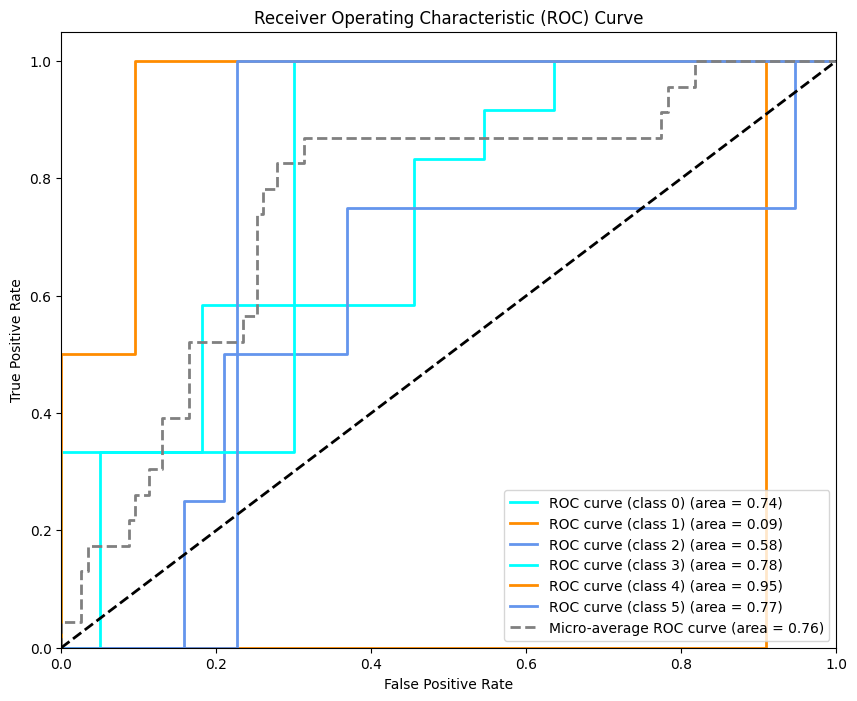

ROC AUC Scores:
Class 0: 0.74
Class 1: 0.09
Class 2: 0.58
Class 3: 0.78
Class 4: 0.95
Class 5: 0.77
Micro-average: 0.76


In [ ]:
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Step 1: Predict probabilities for the test set
y_probs = model.predict(X_test)  # Predicted probabilities for each class

# Step 2: Initialize variables for ROC curve
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Step 3: Plot the ROC curve
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

# Plot ROC curve for each class
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', color='gray', lw=2,
         label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})')

# Diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Step 4: Print ROC AUC scores for all classes
print("ROC AUC Scores:")
for i in range(num_classes):
    print(f"Class {i}: {roc_auc[i]:.2f}")
print(f"Micro-average: {roc_auc['micro']:.2f}")


I.9. Calculate the confusion matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


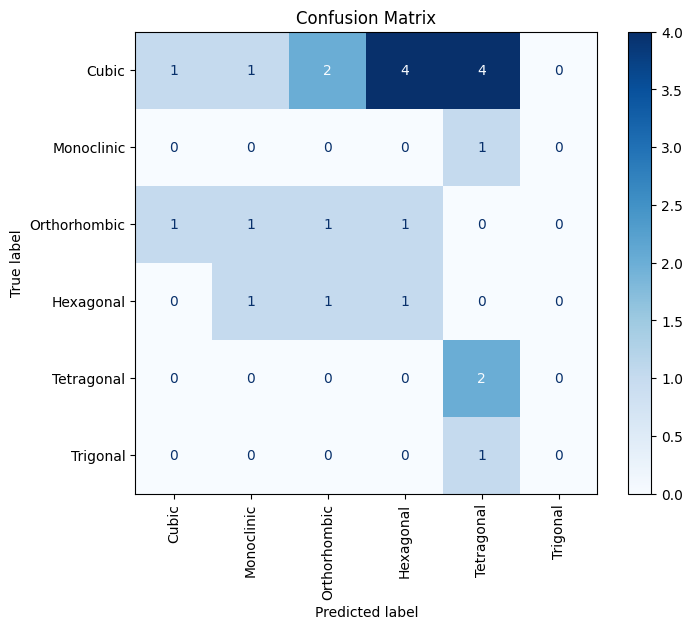

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict class labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)  # Predicted class labels
y_test_labels = np.argmax(y_test, axis=1)  # Actual class labels

# Step 2: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Step 3: Display the confusion matrix
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=crystal_system_mapping.keys())
disp.plot(cmap="Blues", ax=plt.gca(), xticks_rotation=90)  # Rotate x-axis labels vertically
plt.title("Confusion Matrix")
plt.show()



I.10. What are the limitations of this analysis? How would you improve this predictions?

Answer:

# Limitations of the Current Analysis
**1. Class Imbalance:**

* If certain crystal systems are underrepresented in the dataset, the model may struggle to learn their patterns, resulting in poor performance for those classes.

**2. Feature Selection:**

* Not all selected descriptors may be equally relevant to crystal structure prediction. Irrelevant or redundant features may introduce noise, reducing model accuracy.

**3. Model Complexity:**

* Neural networks require large datasets to generalize well. If the dataset is small, the model may overfit, leading to poor performance on unseen data.

**4. Lack of Domain-Specific Features:**

* The current set of descriptors may not fully capture the physics or chemistry governing crystal structures. For example, interactions between elements or specific bonding characteristics are not explicitly modeled.

**5. Evaluation Metrics:**

* Accuracy, ROC curves, and confusion matrices provide only a partial view of model performance. For highly imbalanced datasets, precision, recall, and F1-score for individual classes are more informative.

**6. Data Quality and Size:**

* The dataset size may be insufficient for training deep learning models effectively.
* Noise or errors in the data (e.g., incorrect labels or missing values) can impact model performance.


# How to Improve Predictions
**1. Address Class Imbalance:**

* Use techniques like class weighting (already implemented) or oversampling minority classes (e.g., SMOTE) to balance the dataset:

          from imblearn.over_sampling import SMOTE
          smote = SMOTE(random_state=42)
          X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

**2. Feature Engineering:**

* Introduce Interaction Features: Combine descriptors for the two elements (e.g., differences, sums, or ratios of electronegativities).
* Domain-Specific Features: Incorporate bonding characteristics, lattice parameters, or material properties.

**3. Use Advanced Models:**

* Ensemble Methods: Try ensemble models like XGBoost, LightGBM, or CatBoost, which handle imbalanced datasets well and provide interpretable feature importance.
* Hybrid Models: Combine neural networks with traditional machine learning models for improved accuracy.

**4. Hyperparameter Tuning:**

* Optimize neural network architecture (e.g., number of layers, neurons, dropout rates) using tools like Keras Tuner or GridSearchCV.

**5. Regularization:**

* Add L2 regularization to dense layers to prevent overfitting:

            Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))

**6. Enrich the Dataset:**

* Include more crystal systems and expand the dataset by incorporating data from other sources.
* Use data augmentation techniques, such as generating synthetic data using material simulations.

**7. Cross-Validation:**

* Use k-fold cross-validation to ensure the model generalizes well across all parts of the dataset:

                  from sklearn.model_selection import cross_val_score

**8. Explainability:**

* Use tools like SHAP (SHapley Additive exPlanations) to understand the contributions of individual descriptors to predictions:

                    import shap
                    explainer = shap.Explainer(model, X_train)
                    shap_values = explainer(X_test)
                    shap.summary_plot(shap_values, X_test, feature_names=predictors.columns)

**9. Incorporate Physics-Informed Models:**

* Use crystal-specific models or hybrid models that combine physical simulations with machine learning to better understand crystal structure dependencies.

**10. Use Pretrained Models:**

* Fine-tune a pretrained model if there are existing models trained on similar material datasets.


# Future Directions
1. Incorporate 3D Structure Information: Use 3D crystallographic data to enhance predictions with graph neural networks (GNNs), which are well-suited for structure-based learning.

2. Time Series Predictions: If temporal data is available (e.g., evolution of crystal structures under conditions), explore recurrent neural networks (RNNs) or transformers.

3. Collaborate with Domain Experts: Integrate insights from material scientists to select meaningful features and interpret results.


By addressing these limitations and implementing improvements, the analysis will yield more reliable and interpretable predictions for crystal structure classification. Let me know if you need further guidance!